In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean_01 = np.array([0.1, 0.2])
mean_02 = np.array([5.1, 5.2])

cov_01 = np.array([[1.0, 0.2],[0.2, 1.1]])
cov_02 = np.array([[1.0, 0.3],[0.3, 1.1]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape
print dist_02.shape

(500, 2)
(500, 2)


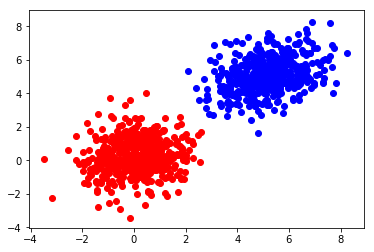

In [4]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c='r')
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='b')

plt.show()

In [5]:
## Total Dataset
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print data.shape

data[:dist_01.shape[0], :dist_01.shape[1]] = dist_01
data[dist_01.shape[0]: rows, :dist_01.shape[1]] = dist_02
data[dist_01.shape[0]: rows, -1] = 1.0

(1000, 3)


In [6]:
np.random.shuffle(data)

data[:10]

array([[ 5.66439671,  4.62852556,  1.        ],
       [-0.1568496 , -0.4649825 ,  0.        ],
       [ 7.33074985,  4.64441204,  1.        ],
       [ 7.81521241,  4.64214482,  1.        ],
       [ 4.61585223,  5.19710382,  1.        ],
       [ 6.48994144,  5.08105473,  1.        ],
       [ 1.3160573 , -0.40036468,  0.        ],
       [ 6.63428281,  4.99263149,  1.        ],
       [ 4.74395791,  5.14668209,  1.        ],
       [ 6.3222439 ,  4.58833716,  1.        ]])

In [7]:
## Data Splitting
split = int(0.75*data.shape[0])
X_train = data[:split, :-1]
Y_train = data[:split, -1]

X_test = data[split:, :-1]
Y_test = data[split:, -1]

print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(750, 2)
(250, 2)
(750,)
(250,)


In [18]:
'''Functions'''
def sigmoid(z):
    sig = 1.0/(1 + np.exp(-1*z))
    return sig

def hypothesis(x_sample, w, b):
    h = (x_sample*w).sum() + b
    return sigmoid(h)
    
def get_error(x, w, y_true, b):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        if y_true[ix] == 0:
            add_term = -1*(np.log(1 - hypothesis(x[ix], w, b)))
            err += add_term
        else:
            add_term = -1*(np.log(hypothesis(x[ix], w, b)))
            err += add_term
    
    err = err/m
    return err

In [24]:
def get_gradients(x, w, y_true, b):
    
    grad_w = np.zeros(w.shape[0])
    grad_b = 0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (hypothesis(x[ix], w, b) - y_true[ix])*(x[ix])
        grad_b += (hypothesis(x[ix], w, b) - y_true[ix])*(1)
    
    return [grad_w, grad_b]

In [25]:
def optimizer(x, w, y_true, b, learning_rate=0.001):
    error = get_error(x, w, y_true, b)
    
    [grad_w, grad_b] = get_gradients(x, w, y_true, b)
    
    b = b - learning_rate*grad_b
    w = w - learning_rate*grad_w
    
    return error, w, b

In [26]:
def Logistic_Regression(X_train, Y_train, nb_epochs=200, learning_rate=0.0001):
    
    loss = []
    
    ## Parameter Initialisation
    W = np.array([0.3, 0.2])
    b = 3.6
    
    for ix in range(nb_epochs):
        error, W, b = optimizer(X_train, W, Y_train, b, learning_rate)
        loss.append(error)
        
    W_final = W
    b_final = b
    
    return loss, W_final, b_final

In [27]:
loss_logs, W_final, b_final = Logistic_Regression(X_train, Y_train)

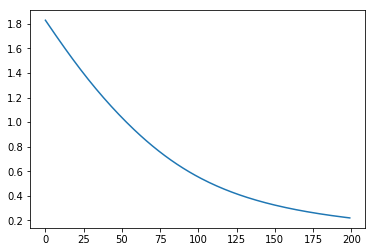

In [28]:
plt.plot(loss_logs)
plt.show()

In [30]:
print W_final
print b_final

[0.62985848 0.23207193]
-0.9538506814121874


In [33]:
a = 1.5
b = 1.5
print a & b

TypeError: unsupported operand type(s) for &: 'float' and 'float'